# Курcовая работа по дисциплине "Технологии машинного обучения"

Выполнил студент группы РТ5-61Б Мирсонов Вячеслав

## Задачи на выполнение курсовой работы

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

## Ход выполнения курсовой работы

### Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.¶

В качестве набора данных мы будем использовать набор данных о пульсарах - нейтронных звезд, которые производят радиоизлучение, обнаруживаемое на Земле - https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate

Каждый кандидат описывается 8 непрерывными переменными и одной переменной класса. Первые четыре представляют собой простые статистические данные, полученные из интегрированного профиля импульса (сложенный профиль). Это массив непрерывных переменных, которые описывают версию сигнала с разрешением по долготе, усредненную как по времени, так и по частоте. Остальные четыре переменные аналогичным образом получаются из кривой DM-SNR.

Будем использовать переменные класса:
1. Mean of the integrated profile (Среднее значение интегрального профиля);
2. Standard deviation of the integrated profile (Стандартное отклонение интегрального профиля);
3. Excess kurtosis of the integrated profile (Избыточный коэффициент эксцесса интегрального профиля);
4. Skewness of the integrated profile (Асимметрия интегрального профиля);
5. Mean of the DM-SNR curve (Среднее значение кривой DM-SNR);
6. Standard deviation of the DM-SNR curve (Стандартное отклонение кривой DM-SNR);
7. Excess kurtosis of the DM-SNR curve (Избыточный коэффициент эксцесса кривой DM-SNR);
8. Skewness of the DM-SNR curve (Асимметрия кривой DM-SNR);
9. Class (Класс).

### Импорт библиотек

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [156]:
#Загрузим файл датасета в помощью библиотеки Pandas.
# Загрузка данных
data = pd.read_csv("pulsar_stars2.csv")
data.shape

(5000, 9)

### Основные характеристики датасета

In [157]:
# Первые 5 строк датасета
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [158]:
# Список колонок
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [159]:
# Список колонок с типами данных 
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [160]:
# Проверим наличие пустых значений
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

###### Вывод. Представленный набор данных не содержит пропусков.

#### Построение графиков для понимания структуры данных

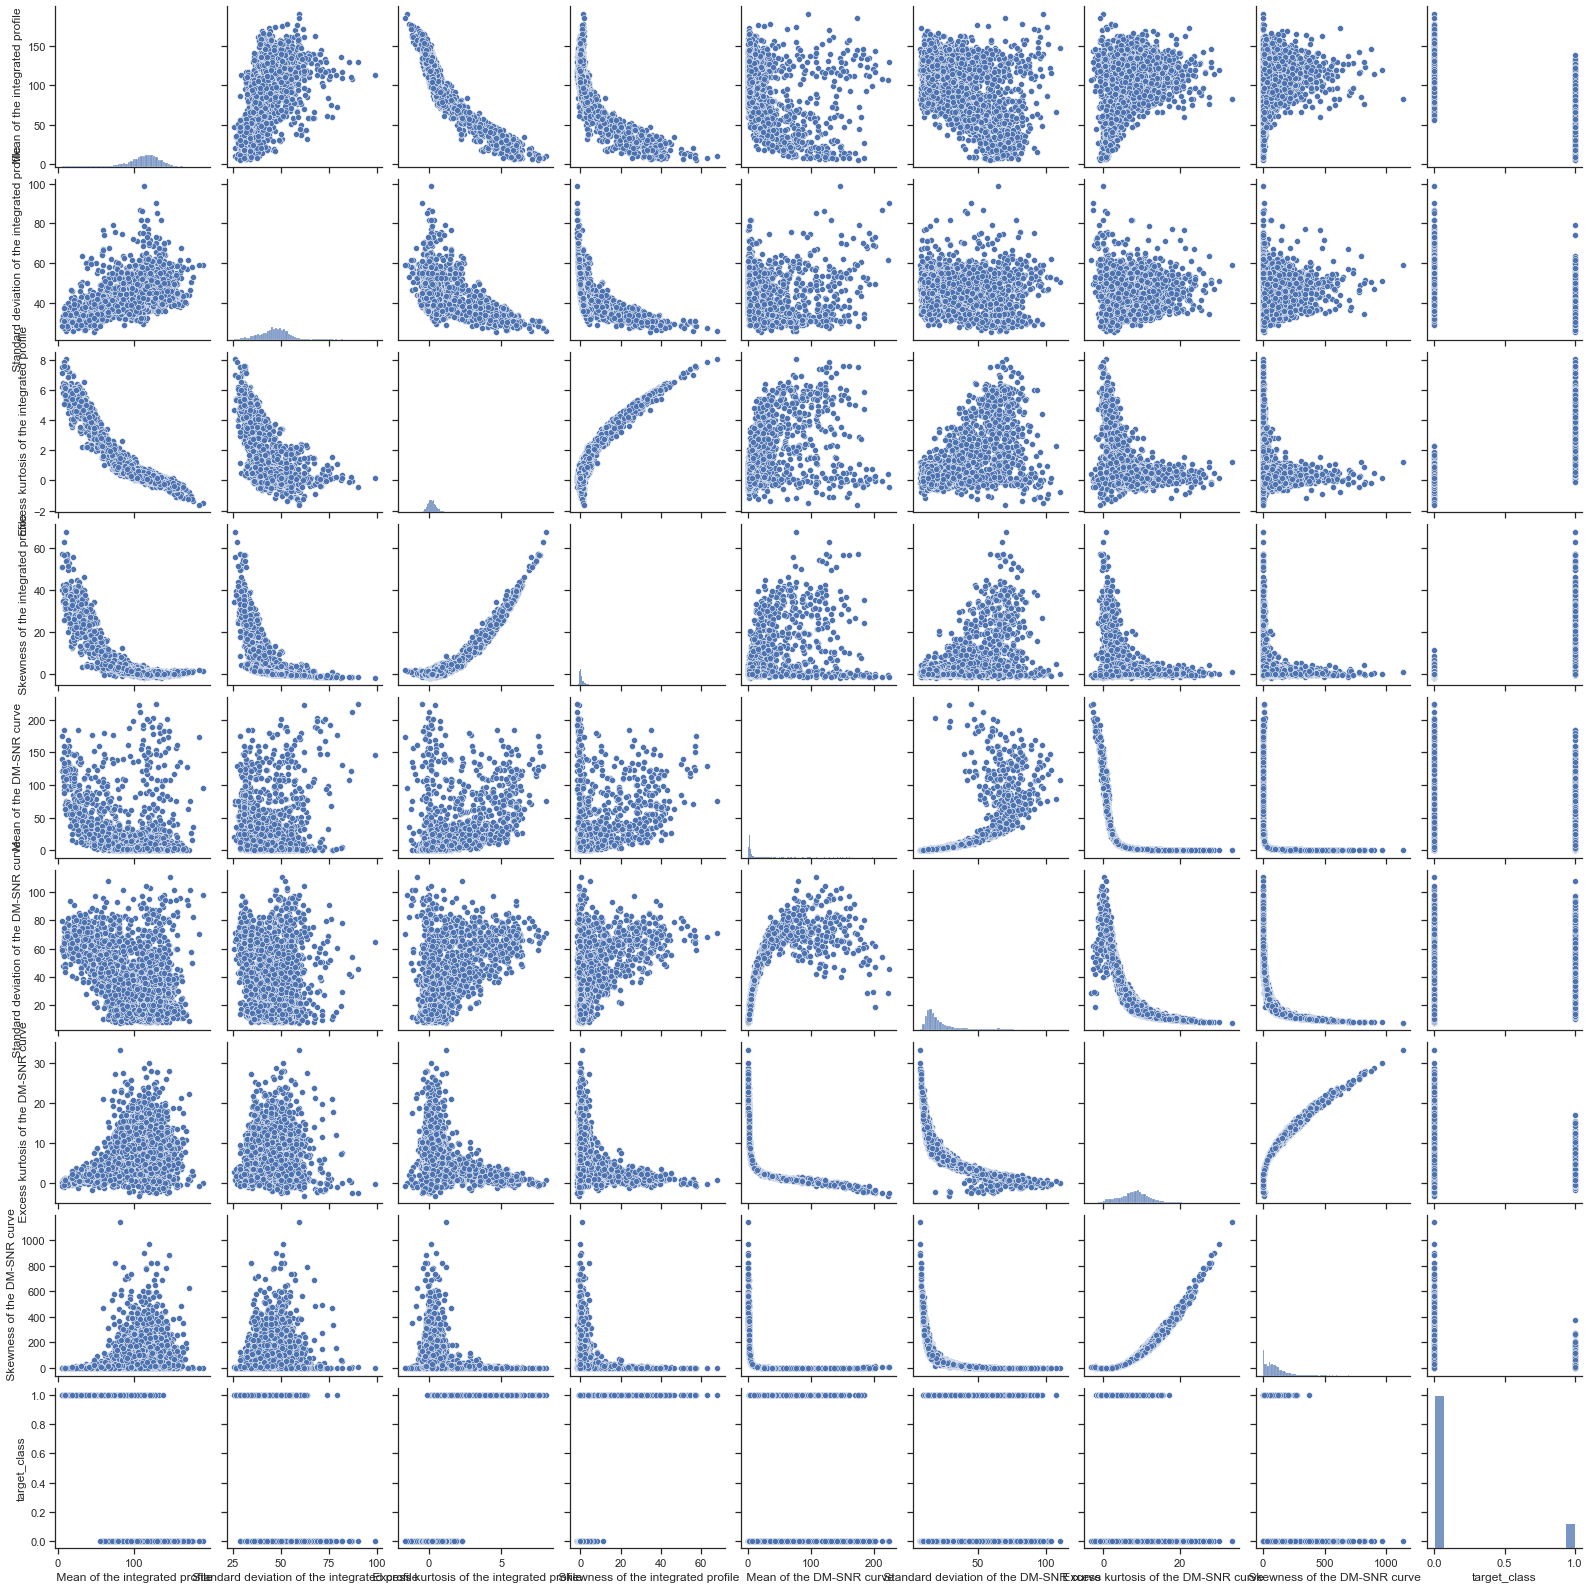

In [161]:
# Парные диаграммы
sns.pairplot(data)

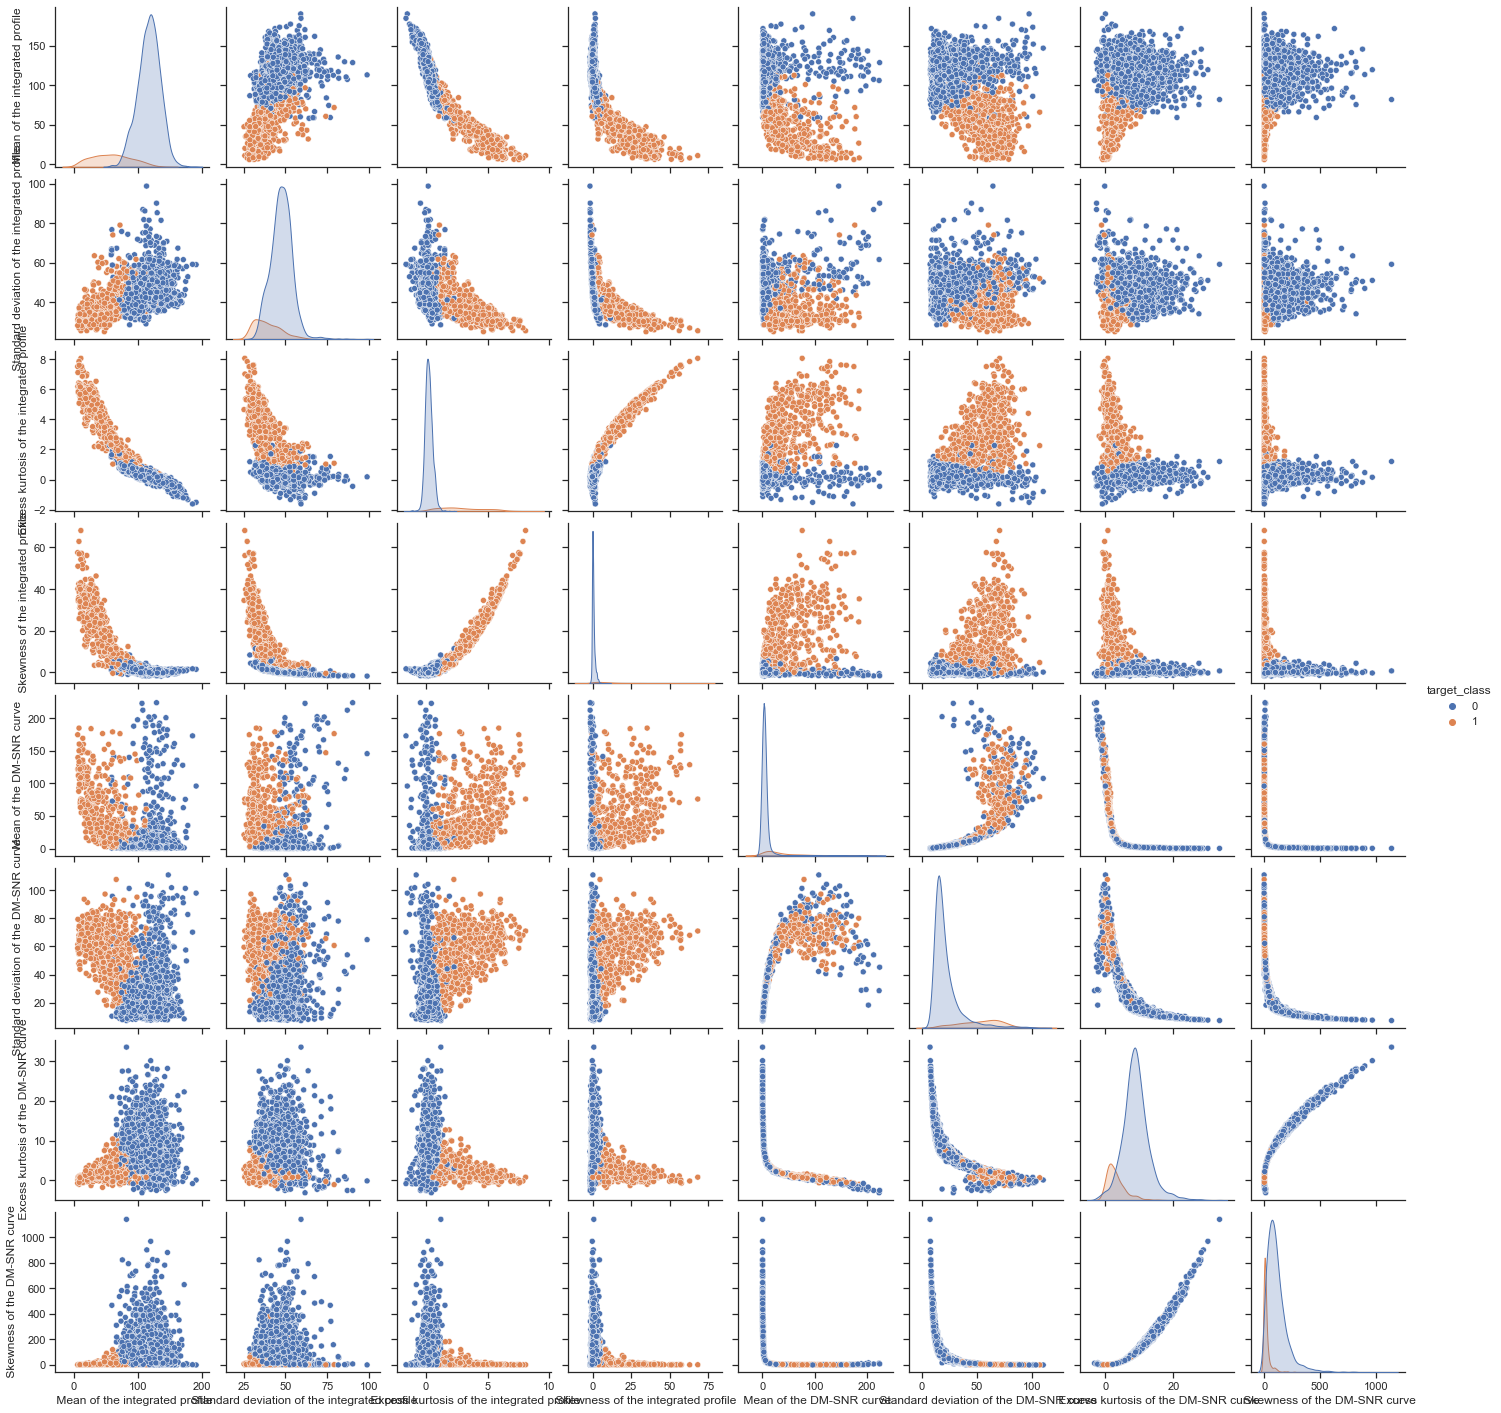

In [162]:
sns.pairplot(data, hue="target_class")

In [163]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['target_class'].unique()

array([0, 1], dtype=int64)

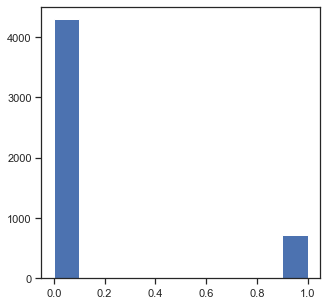

In [164]:
# Оценим дисбаланс классов для target_class
fig, ax = plt.subplots(figsize=(5,5)) 
plt.hist(data['target_class'])
plt.show()

In [165]:
data['target_class'].value_counts()

0    4290
1     710
Name: target_class, dtype: int64

In [166]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['target_class'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 85.8%, а класс 1 составляет 14.2%.


###### Вывод. Дисбаланс классов присутствует, но является приемлемым.

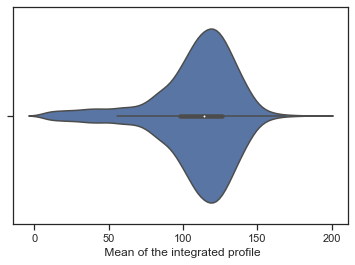

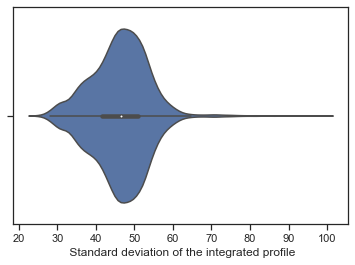

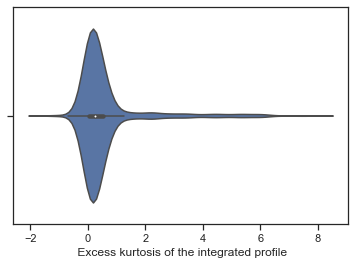

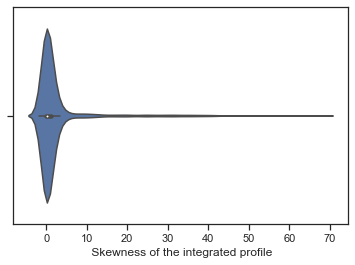

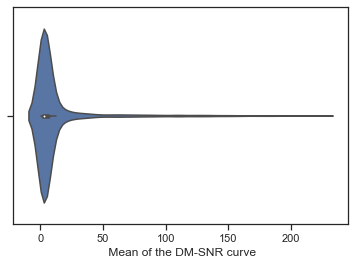

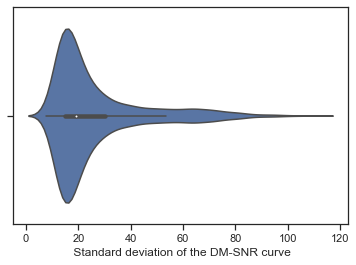

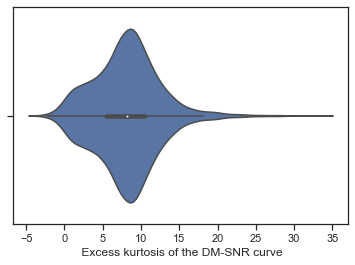

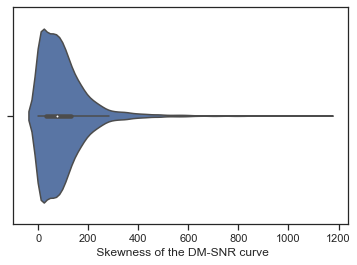

In [167]:
# список колонок с числовыми данными
num_cols = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve']
# Скрипичные диаграммы для числовых колонок
for col in num_cols:
    sns.violinplot(x=data[col])
    plt.show()

### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [168]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

Для построения моделей будем использовать все признаки.

Категориальные признаки отсутствуют, их кодирования не требуется.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовые выборки.

#### MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

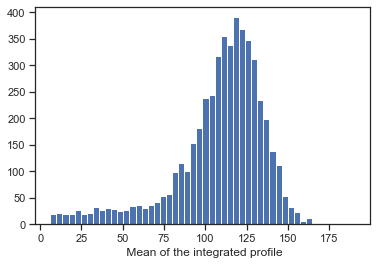

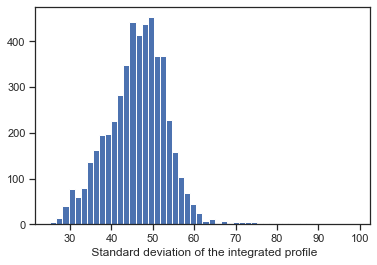

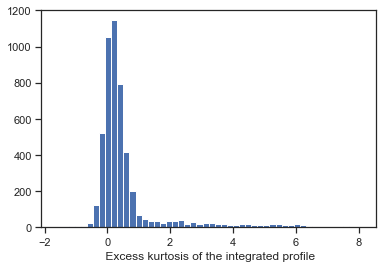

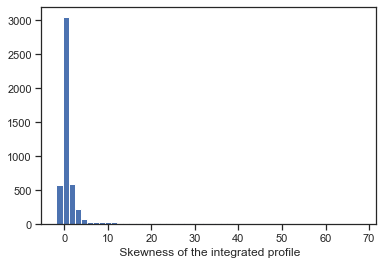

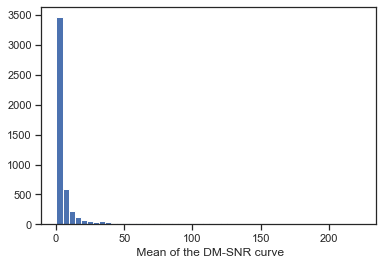

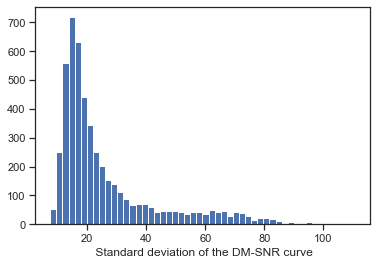

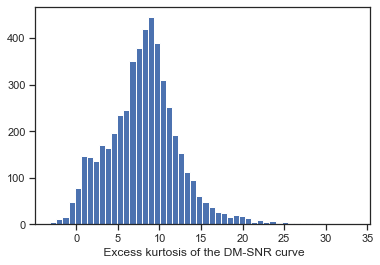

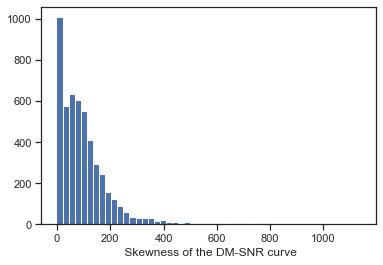

In [169]:
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [170]:
# MinMax масштабирование
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[num_cols])

# Добавим масштабированные данные в набор данных
for i in range(len(num_cols)):
    col = num_cols[i]
    new_col_name = col + '_MinMaxscaled'
    data[new_col_name] = sc1_data[:,i]

In [171]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,Mean of the integrated profile_MinMaxscaled,Standard deviation of the integrated profile_MinMaxscaled,Excess kurtosis of the integrated profile_MinMaxscaled,Skewness of the integrated profile_MinMaxscaled,Mean of the DM-SNR curve_MinMaxscaled,Standard deviation of the DM-SNR curve_MinMaxscaled,Excess kurtosis of the DM-SNR curve_MinMaxscaled,Skewness of the DM-SNR curve_MinMaxscaled
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0.729381,0.414141,0.143360,0.015627,0.013046,0.113007,0.303442,0.066723
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0.522834,0.457625,0.215559,0.018268,0.006221,0.071820,0.374450,0.113251
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0.525590,0.191977,0.200912,0.040677,0.012693,0.138535,0.296898,0.057032
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0.708688,0.434460,0.160500,0.016534,0.015032,0.130924,0.273984,0.048647
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0.448035,0.210065,0.229542,0.041712,0.003988,0.038955,0.475275,0.222829


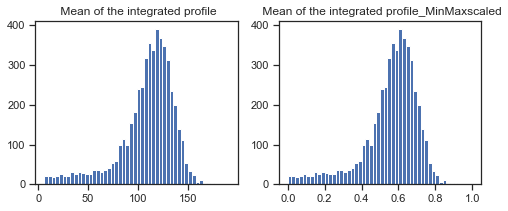

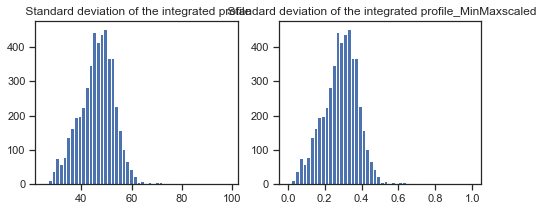

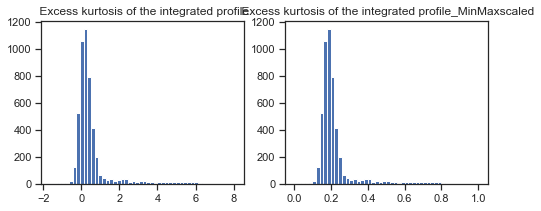

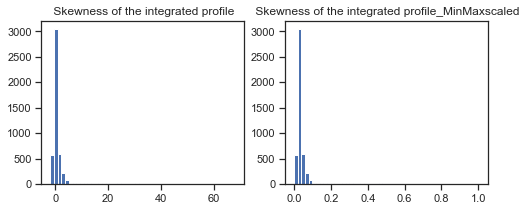

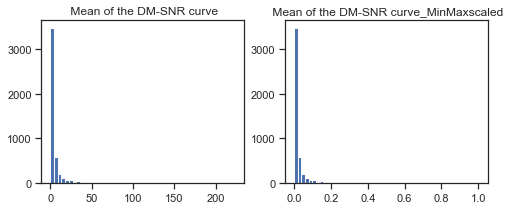

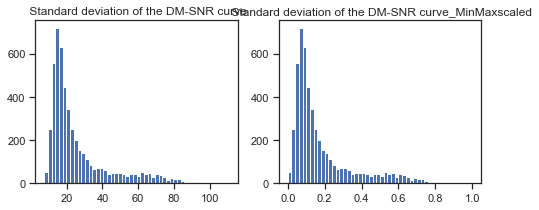

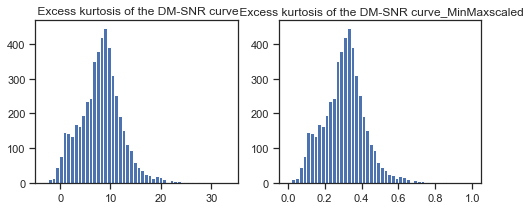

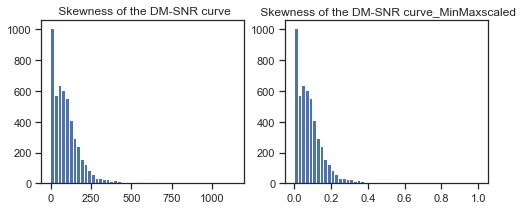

In [172]:
# Гистограмма по отмасштабированным признакам
# Проверим, что масштабирование не повлияло на распределение данных
for col in num_cols:
    col_scaled = col + '_MinMaxscaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [173]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = num_cols + ['target_class']
corr_cols_1

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [174]:
scale_cols_postfix = [x+'_MinMaxscaled' for x in num_cols]
corr_cols_2 = scale_cols_postfix + ['target_class']
corr_cols_2

[' Mean of the integrated profile_MinMaxscaled',
 ' Standard deviation of the integrated profile_MinMaxscaled',
 ' Excess kurtosis of the integrated profile_MinMaxscaled',
 ' Skewness of the integrated profile_MinMaxscaled',
 ' Mean of the DM-SNR curve_MinMaxscaled',
 ' Standard deviation of the DM-SNR curve_MinMaxscaled',
 ' Excess kurtosis of the DM-SNR curve_MinMaxscaled',
 ' Skewness of the DM-SNR curve_MinMaxscaled',
 'target_class']

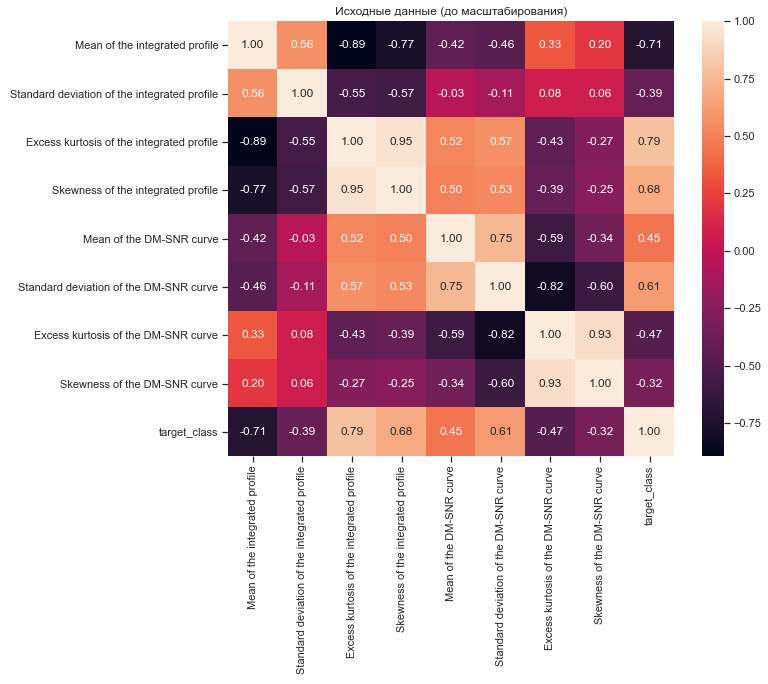

In [175]:
#Корреляционная матрица исходных данных
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

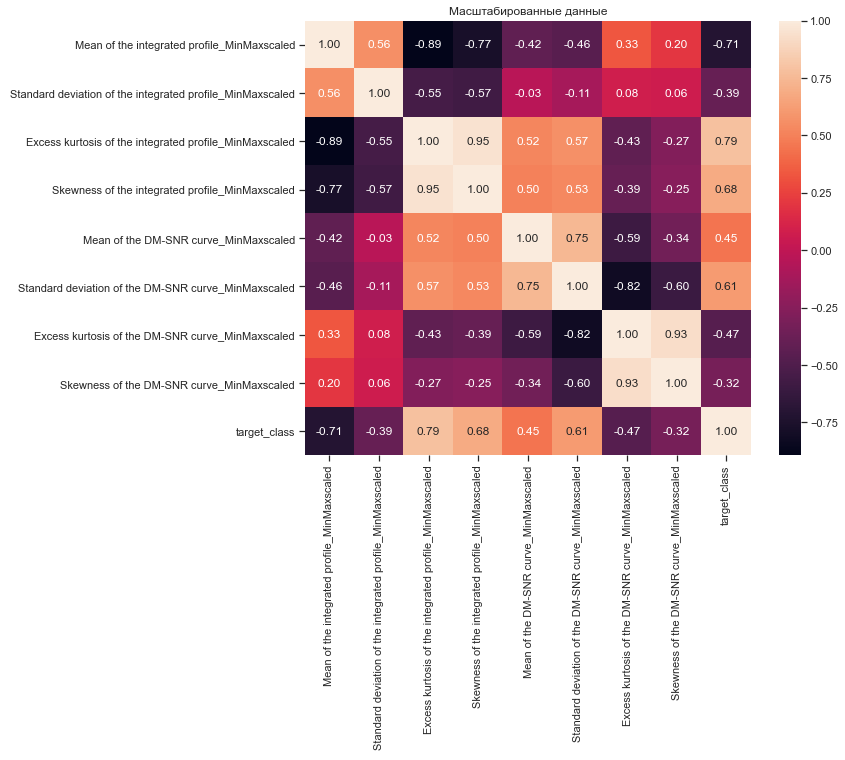

In [176]:
#Корреляционная матрица масштабированных данных
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации "target_class" наиболее сильно коррелирует с "Excess kurtosis of the integrated profile" ("Избыточный коэффициент эксцесса интегрального профиля") (0.79) и "Skewness of the integrated profile" ("Асимметрия интегрального профиля") (0.68). Эти признаки обязательно следует оставить в модели классификации.
- Признаки "Excess kurtosis of the DM-SNR curve" ("Избыточный коэффициент эксцесса кривой DM-SNR") и "Skewness of the DM-SNR curve" ("Асимметрия кривой DM-SNR") имеют корреляцию, близкую по модулю к 1, поэтому оба признака не следуют включать в модели. Будем использовать признак "Excess kurtosis of the DM-SNR curve" ("Избыточный коэффициент эксцесса кривой DM-SNR"), так как он лучше чем "Skewness of the DM-SNR curve" ("Асимметрия кривой DM-SNR") коррелирует и с целевым признаком классификации, и с целевым признаком регрессии.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

### Выбор метрик для последующей оценки качества моделей.¶

#### В качестве метрик для решения задачи классификации будем использовать:

###### Метрики, формируемые на основе матрицы ошибок:

###### Precision
Precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

###### Recall
Recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

###### F1
F1 - объединение precision и recall в единую метрику - используется Fβ-мера (F1-мера), которая вычисляется как среднее гармоническое от precision и recall.

###### Accuracy
Accuracy - вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов. Метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов. Так как в данном наборе данных присутствует дисбаланс классов, будем использовать balanced_accuracy_score.

###### ROC AUC
ROC AUC. Основана на вычислении следующих характеристик:
- True Positive Rate, откладывается по оси ординат. Совпадает с recall.
- False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

In [177]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkblue',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [178]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(3, 3)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

### Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

###### Для задачи классификации будем использовать следующие модели:

- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Cлучайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [179]:
# Признаки для задачи классификации
class_cols = [' Mean of the integrated profile_MinMaxscaled',
             ' Standard deviation of the integrated profile_MinMaxscaled',
             ' Excess kurtosis of the integrated profile_MinMaxscaled',
             ' Skewness of the integrated profile_MinMaxscaled',
             ' Mean of the DM-SNR curve_MinMaxscaled',
             ' Standard deviation of the DM-SNR curve_MinMaxscaled',
             ' Excess kurtosis of the DM-SNR curve_MinMaxscaled']

In [180]:
X = data[class_cols]
Y = data['target_class']
X.shape

(5000, 7)

In [181]:
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
data_X_train.shape, data_X_test.shape, data_Y_train.shape, data_Y_test.shape

((3750, 7), (1250, 7), (3750,), (1250,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [182]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [183]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [184]:
def train_model(model_name, model, MetricLogger):
    model.fit(data_X_train, data_Y_train)
    Y_pred = model.predict(data_X_test)
    
    precision = precision_score(data_Y_test.values, Y_pred)
    recall = recall_score(data_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(data_Y_test.values, Y_pred)
    f1 = f1_score(data_Y_test.values, Y_pred)
    bal_accuracy = balanced_accuracy_score(data_Y_test.values, Y_pred)
    
    MetricLogger.add('precision', model_name, precision)
    MetricLogger.add('recall', model_name, recall)
    MetricLogger.add('f1', model_name, f1)
    MetricLogger.add('bal_accuracy', model_name, bal_accuracy)
    MetricLogger.add('roc_auc', model_name, roc_auc)

    print('--------------------------', model, '--------------------------')
    #print(model)
    
    draw_roc_curve(data_Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, data_X_test, data_Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

-------------------------- LogisticRegression() --------------------------


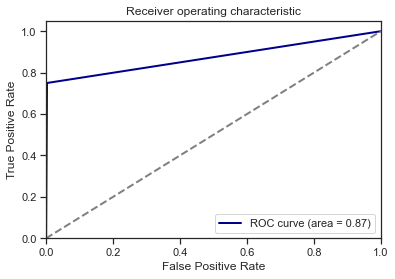

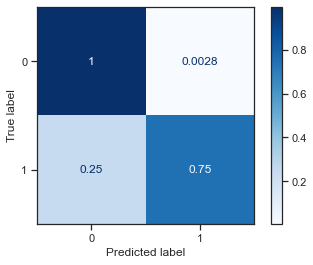

-------------------------- KNeighborsClassifier() --------------------------


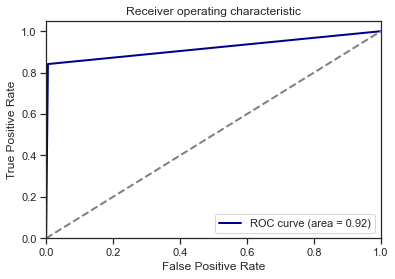

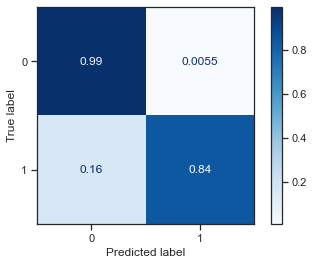

-------------------------- SVC(probability=True) --------------------------


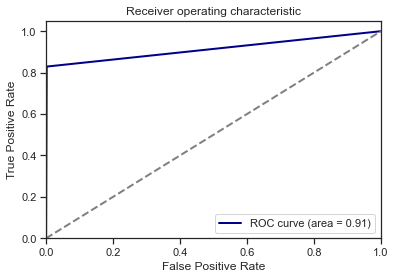

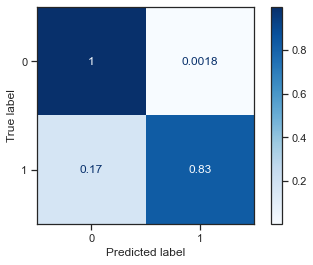

-------------------------- DecisionTreeClassifier() --------------------------


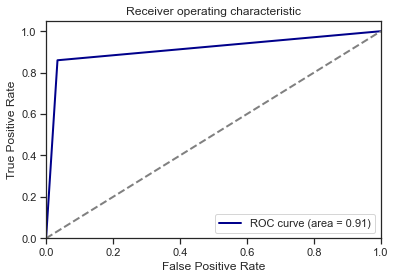

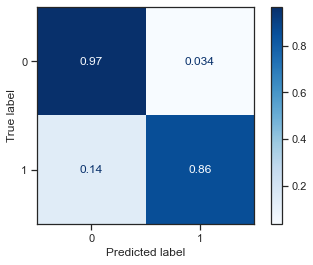

-------------------------- RandomForestClassifier() --------------------------


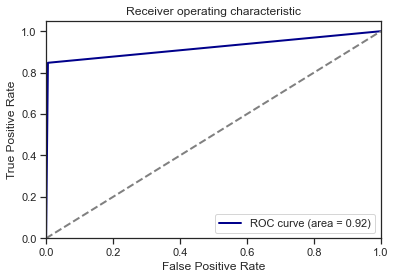

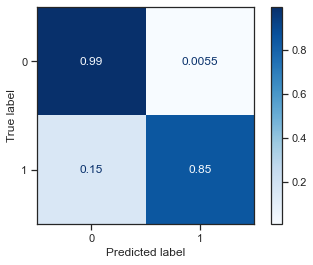

-------------------------- GradientBoostingClassifier() --------------------------


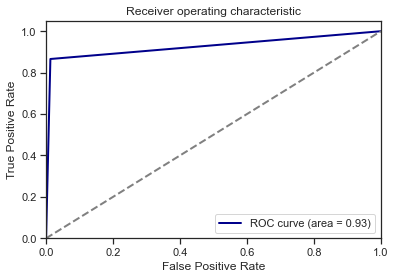

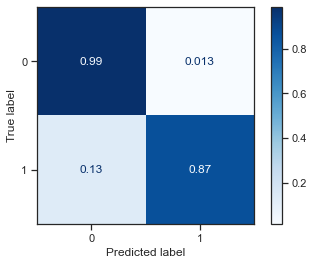

In [185]:
for model_name, model in clas_models.items():
    train_model(model_name, model, clasMetricLogger)

### Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

###### Градиентный бустинг


In [186]:
GB_params={"max_features":range(1,8), "max_leaf_nodes":range(2,16)}
gs_GB = RandomizedSearchCV(GradientBoostingClassifier(), GB_params, cv=5, scoring='balanced_accuracy')
gs_GB.fit(data_X_train, data_Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_features': range(1, 8),
                                        'max_leaf_nodes': range(2, 16)},
                   scoring='balanced_accuracy')

In [187]:
# Лучшая модель
gs_GB.best_estimator_

GradientBoostingClassifier(max_features=5, max_leaf_nodes=13)

In [188]:
# Лучшее значение параметров
gs_GB.best_params_

{'max_leaf_nodes': 13, 'max_features': 5}

###### Случайный лес

Будем использовать случайный поиск, т.к. полный решетчатый поиск работает слишком долго.

In [189]:
RF_params={"max_depth":range(1,11), "n_estimators":range(2,400)}
gs_RF = RandomizedSearchCV(RandomForestClassifier(), RF_params, cv=5, scoring='balanced_accuracy')
gs_RF.fit(data_X_train, data_Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'n_estimators': range(2, 400)},
                   scoring='balanced_accuracy')

In [190]:
# Лучшая модель
gs_RF.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=170)

In [191]:
# Лучшее значение параметров
gs_RF.best_params_

{'n_estimators': 170, 'max_depth': 9}

###### Решающее дерево


In [192]:
tree_params={"max_depth":range(1,11), "max_features":range(1,8)}
gs_Tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='balanced_accuracy')
gs_Tree.fit(data_X_train, data_Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 8)},
             scoring='balanced_accuracy')

In [193]:
# Лучшая модель
gs_Tree.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=6)

In [194]:
# Лучшее значение параметров
gs_Tree.best_params_

{'max_depth': 5, 'max_features': 6}

##### Машина опорных векторов

In [195]:
SVC_grid={"C":np.logspace(-3,3,7)}
gs_SVC = GridSearchCV(SVC(), SVC_grid, cv=5, scoring='balanced_accuracy')
gs_SVC.fit(data_X_train, data_Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='balanced_accuracy')

In [196]:
# Лучшая модель
gs_SVC.best_estimator_

SVC(C=1000.0)

In [197]:
# Лучшее значение параметров
gs_SVC.best_params_

{'C': 1000.0}

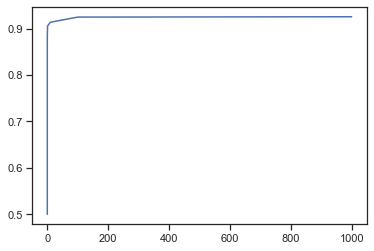

In [198]:
# Изменение качества на тестовой выборке
plt.plot(np.logspace(-3,3,7), gs_SVC.cv_results_['mean_test_score'])

##### Логистическая регрессия

In [199]:
grid={"C":np.logspace(-3,3,7)}
gs_LR = GridSearchCV(LogisticRegression(), grid, cv=5, scoring='balanced_accuracy')
gs_LR.fit(data_X_train, data_Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='balanced_accuracy')

In [200]:
# Лучшая модель
gs_LR.best_estimator_

LogisticRegression(C=1000.0)

In [201]:
# Лучшее значение параметров
gs_LR.best_params_

{'C': 1000.0}

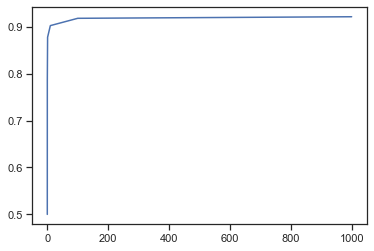

In [202]:
# Изменение качества на тестовой выборке
plt.plot(np.logspace(-3,3,7), gs_LR.cv_results_['mean_test_score'])

##### Метод ближайших соседей

In [203]:
n_range = np.array(range(1,500,50))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451])}]

In [204]:
gs_N = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='balanced_accuracy')
gs_N.fit(data_X_train, data_Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451])}],
             scoring='balanced_accuracy')

In [205]:
# Лучшая модель
gs_N.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [206]:
# Лучшее значение параметров
gs_N.best_params_

{'n_neighbors': 1}

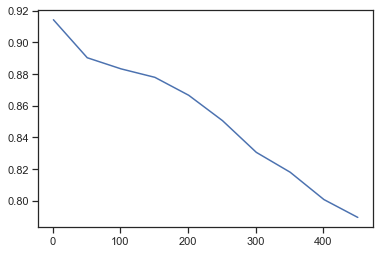

In [207]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, gs_N.cv_results_['mean_test_score'])

### Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [208]:
models_grid = {'KNN_new':gs_N.best_estimator_,
              'LogR_new':gs_LR.best_estimator_,
              'SVC_new':gs_SVC.best_estimator_,
              'Tree_new':gs_Tree.best_estimator_,
              'RF_new':gs_RF.best_estimator_,
              'GB_new':gs_GB.best_estimator_}

-------------------------- KNeighborsClassifier(n_neighbors=1) --------------------------


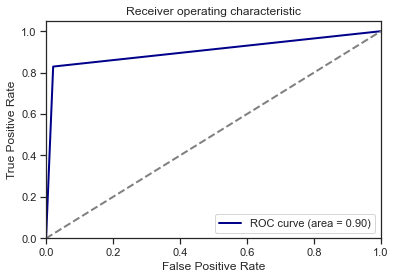

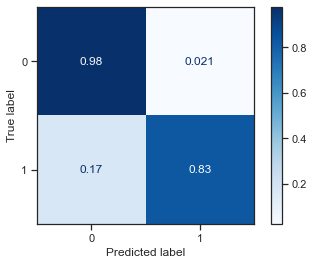

-------------------------- LogisticRegression(C=1000.0) --------------------------


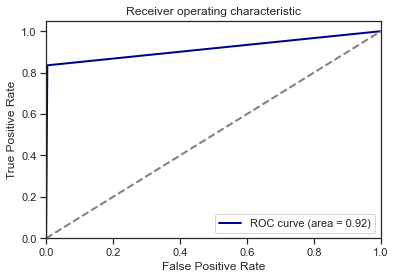

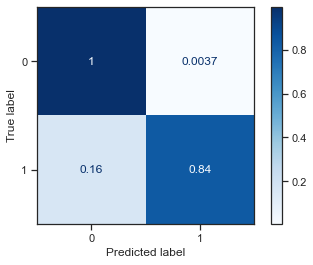

-------------------------- SVC(C=1000.0) --------------------------


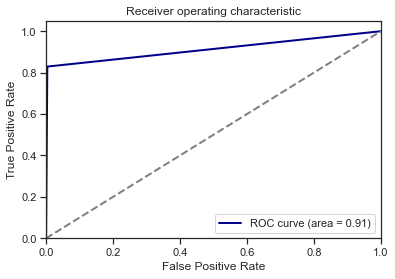

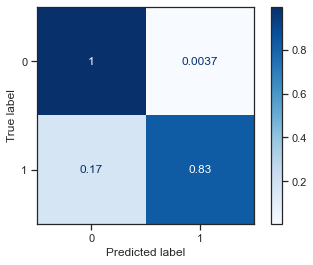

-------------------------- DecisionTreeClassifier(max_depth=5, max_features=6) --------------------------


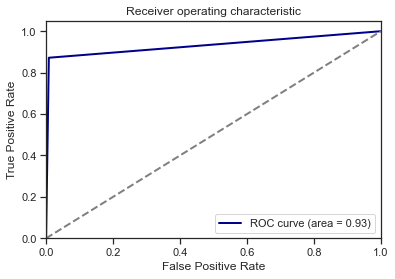

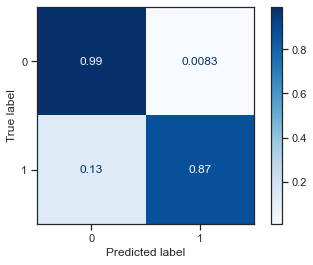

-------------------------- RandomForestClassifier(max_depth=9, n_estimators=170) --------------------------


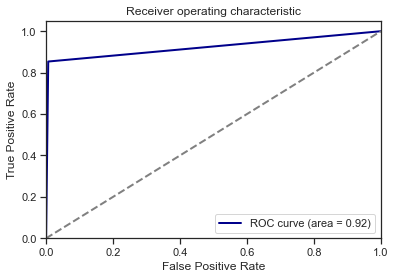

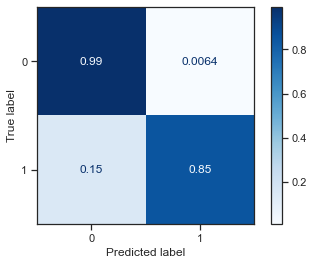

-------------------------- GradientBoostingClassifier(max_features=5, max_leaf_nodes=13) --------------------------


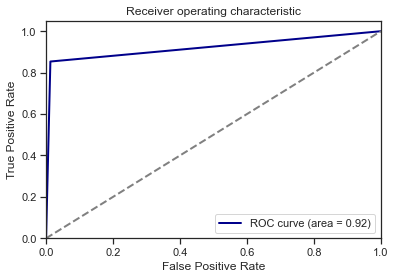

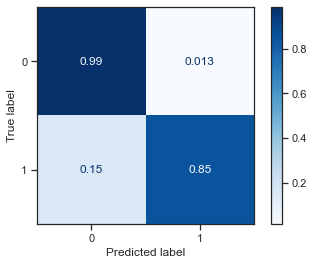

In [209]:
for model_name, model in models_grid.items():
    train_model(model_name, model, clasMetricLogger)

### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [210]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'bal_accuracy', 'roc_auc'],
      dtype=object)

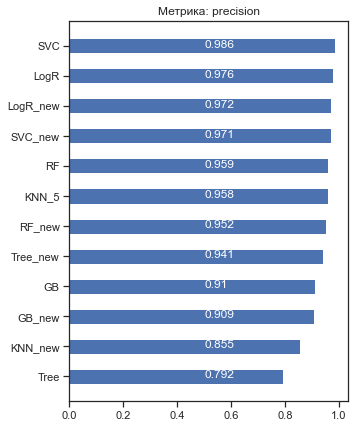

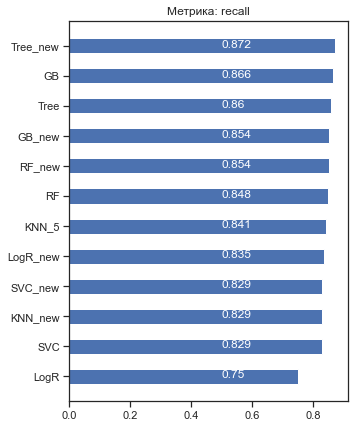

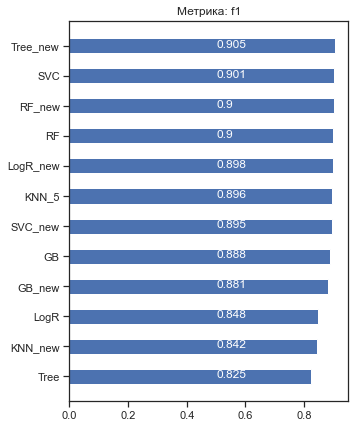

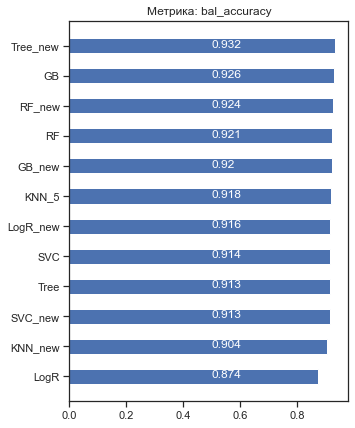

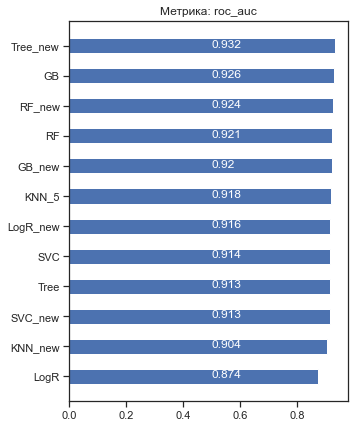

In [211]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(5, 7))

#### Вывод: лучшими оказались модели на основе 
линейной регресии и решающего дерева. 
При отдельных запусках вместо решающего дерева оказывается лучшей модель случайного леса.